# Imports

In [743]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate

# Configs

In [744]:
LABELED_PATH = "data/results/labels.parquet"
PREDICTED_XGB_PATH = "data/results/xgb_prediction_labeled.parquet"
PREDICTED_XGB_ARIMA_PATH = "data/results/xgb_predictions.parquet"
PREDICTED_REGRESSION_PATH = "data/results/ridge_predictions.parquet"
PREDICTED_ARIMA_PATH = "data/results/arima_predict.parquet"
TEST_START_DATE = '2023-04-20'
TEST_START_DATE_BASE_LINE = '2023-03-13'
IMPORTANT_LOCATIONS = 50
SAVE_PLOT_PATH = 'data/pngs'
warnings.filterwarnings('ignore')

In [745]:
report_dict = {
    'important_lacations':{
        'MAPE':{
            'baseline_last_week':None,
            #'model_regression':None,
            'model_xgboost':None
        },
        'MAE':{
            'baseline_last_week':None,
            #'model_regression':None,
            'model_xgboost':None
        },
        'RMSE':{
            'baseline_last_week':None,
            #'model_regression':None,
            'model_xgboost':None
        }
        
    },    
    'others_locations':{
        'MAPE':{
            'baseline_last_week':None,
            #'model_regression':None,
            'model_xgboost':None
        },
        'MAE':{
            'baseline_last_week':None,
            #'model_regression':None,
            'model_xgboost':None
        },
        'RMSE':{
            'baseline_last_week':None,
            #'model_regression':None,
            'model_xgboost':None
        }
        
    },
    'all_locations':{
        'MAPE':{
            'baseline_last_week':None,
            #'model_regression':None,
            'model_xgboost':None
        },
        'MAE':{
            'baseline_last_week':None,
            #'model_regression':None,
            'model_xgboost':None
        },
        'RMSE':{
            'baseline_last_week':None,
            #'model_regression':None,
            'model_xgboost':None
        }
    },
    
    
}

In [746]:
predictions_dict = {
    'baseline_last_day':None,
    'baseline_last_week':None,
    #'model_regression':None,
    'model_xgboost':None,
}

In [747]:
sorted_locations_dict={
    'baseline_last_week':None,
    #'model_regression':None,
    'model_xgboost':None,
}

In [748]:
predictions_mean_error_dict={
    
    'baseline_last_week':
    {
        'Location':
                {
                'Important_loc':None,
                'Others_loc':None,
                'All_loc':None
                },
        'Date':
                {
                'Important_loc':None,
                'Others_loc':None,
                'All_loc':None
                },
        'day_of_week':
                {
                'Important_loc':None,
                'Others_loc':None,
                'All_loc':None
                }
    },
#     'model_regression':
#     {
#         'Location':
#                 {
#                 'Important_loc':None,
#                 'Others_loc':None,
#                 'All_loc':None
#                 },
#         'Date':
#                 {
#                 'Important_loc':None,
#                 'Others_loc':None,
#                 'All_loc':None
#                 },
#         'day_of_week':
#                 {
#                 'Important_loc':None,
#                 'Others_loc':None,
#                 'All_loc':None
#                 }
#     },
    'model_xgboost':
    {
        'Location':
                {
                'Important_loc':None,
                'Others_loc':None,
                'All_loc':None
                },
        'Date':
                {
                'Important_loc':None,
                'Others_loc':None,
                'All_loc':None
                },
        'day_of_week':
                {
                'Important_loc':None,
                'Others_loc':None,
                'All_loc':None
                }
    },
}

# Load Data

## Load labeled data

In [749]:
labeled_df = pd.read_parquet(LABELED_PATH)
print(labeled_df.shape)
labeled_df.head()

(35505, 17)


,Location,Date,trip_dists,Demand,total_amount,passenger_count,fare_amount,extra,RatecodeID,congestion_surcharge,tip_amount,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
0,1,2023-01-01,36.74,40.0,276.00,2.0,250.0,0.0,5.0,0.0,393.43,0,0,1,0,0,0
1,1,2023-01-02,45.33,31.0,279.50,1.0,253.0,0.0,5.0,0.0,363.76,0,0,1,0,0,0
2,1,2023-01-03,0.54,27.0,351.00,1.0,350.0,0.0,5.0,0.0,296.50,0,0,1,0,0,0
3,1,2023-01-04,2.60,7.0,204.69,2.0,150.0,0.0,5.0,0.0,194.64,0,0,1,0,0,0
4,1,2023-01-05,68.41,15.0,213.00,2.0,200.0,2.5,5.0,0.0,200.13,0,0,1,0,0,0


In [750]:
test_df = labeled_df.loc[labeled_df['Date']>=TEST_START_DATE]
test_df_base_line = labeled_df.loc[labeled_df['Date']>=TEST_START_DATE_BASE_LINE]
test_df = test_df.reset_index(drop = True)
test_df_base_line = test_df_base_line.reset_index(drop = True)
print(test_df.shape)
test_df.head()

(6838, 17)


,Location,Date,trip_dists,Demand,total_amount,passenger_count,fare_amount,extra,RatecodeID,congestion_surcharge,tip_amount,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
0,1,2023-04-20,21.26,15.0,157.50,1.0,133.0,0.0,5.0,0.0,256.00,0,0,1,0,0,0
1,1,2023-04-21,0.00,15.0,177.75,1.0,168.2,2.5,5.0,0.0,160.95,0,0,1,0,0,0
2,1,2023-04-22,31.29,16.0,251.00,1.0,250.0,1.0,5.0,0.0,127.75,0,0,1,0,0,0
3,1,2023-04-23,16.34,24.0,174.90,1.0,130.0,0.0,5.0,0.0,253.49,0,0,1,0,0,0
4,1,2023-04-24,0.11,10.0,147.60,2.0,122.0,0.0,5.0,0.0,123.05,0,0,1,0,0,0


## Load Predicted Data

In [751]:
predictions_dict['model_xgboost'] = pd.read_parquet(PREDICTED_XGB_ARIMA_PATH)
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(6838, 3)


,Location,Date,Predicted_demand
0,1,2023-04-20,13.626561
1,1,2023-04-21,9.513592
2,1,2023-04-22,13.594635
3,1,2023-04-23,15.548916
4,1,2023-04-24,16.854700


### BaseLine Models

In [752]:
def baseline_predict(dataset, shift_val):
    predicted_demand = dataset.groupby(['Location'])['Demand'].shift(shift_val)
    predicted_data = dataset.filter(['Location', 'Date'])
    predicted_data['Predicted_demand'] = predicted_demand
    predicted_data.dropna(inplace = True)
    return predicted_data

In [753]:
#test_df_base_line.groupby(['Location', 'Date'])['Demand'].shift(shift_val)

In [754]:
predictions_dict['baseline_last_week'] = baseline_predict(test_df_base_line, 7)
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(14998, 3)


,Location,Date,Predicted_demand
7,1,2023-03-20,13.0
8,1,2023-03-21,14.0
9,1,2023-03-22,5.0
10,1,2023-03-23,12.0
11,1,2023-03-24,18.0


### Join Predictions and Actual

In [755]:
'''def join_actual_predict(actual_df, predicted_df):
    actual_predicted_df = actual_df.copy()
    actual_predicted_df = actual_predicted_df.reset_index(drop = True)
    predicted_df = predicted_df.reset_index(drop = True)
    actual_predicted_df['Predicted_demand'] = predicted_df['Predicted_demand']
    actual_predicted_df = actual_predicted_df.dropna()
    actual_predicted_df['day_of_week'] = actual_predicted_df['Date'].dt.dayofweek
    return actual_predicted_df'''

"def join_actual_predict(actual_df, predicted_df):\n    actual_predicted_df = actual_df.copy()\n    actual_predicted_df = actual_predicted_df.reset_index(drop = True)\n    predicted_df = predicted_df.reset_index(drop = True)\n    actual_predicted_df['Predicted_demand'] = predicted_df['Predicted_demand']\n    actual_predicted_df = actual_predicted_df.dropna()\n    actual_predicted_df['day_of_week'] = actual_predicted_df['Date'].dt.dayofweek\n    return actual_predicted_df"

In [756]:
predictions_dict['baseline_last_week'] = pd.merge(test_df, predictions_dict['baseline_last_week']).filter(['Location', 'Date', 'Demand', 'Predicted_demand'])
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(6890, 4)


,Location,Date,Demand,Predicted_demand
0,1,2023-04-20,15.0,18.0
1,1,2023-04-21,15.0,12.0
2,1,2023-04-22,16.0,15.0
3,1,2023-04-23,24.0,24.0
4,1,2023-04-24,10.0,16.0


In [757]:
predictions_dict['model_xgboost'] = pd.merge(test_df, predictions_dict['model_xgboost']).filter(['Location', 'Date', 'Demand', 'Predicted_demand'])
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(6890, 4)


,Location,Date,Demand,Predicted_demand
0,1,2023-04-20,15.0,13.626561
1,1,2023-04-21,15.0,9.513592
2,1,2023-04-22,16.0,13.594635
3,1,2023-04-23,24.0,15.548916
4,1,2023-04-24,10.0,16.854700


### Sort Locations by Demand

In [758]:
def sort_locations_on_demand(predictions_dict,sorted_locations_dict):
    for label,predictions_df in predictions_dict.items():
        if (predictions_df is not None):
            sorted_index = predictions_df.groupby('Location')['Demand'].aggregate(['sum']).sort_values('sum', ascending=False)
            sorted_index = sorted_index.reset_index()
            sorted_locations_dict[label] = sorted_index

In [759]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)
sorted_locations_dict['model_xgboost'].head()

,Location,sum
0,132,152378.0
1,237,147803.0
2,161,135701.0
3,236,130246.0
4,138,108341.0


# Mean error Calculation

### Error Columns

In [760]:
def calculate_error(actual_predicted_dict: dict):
    for label,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            actual_predicted_df['error'] = np.abs(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_predicted_df['squared_error'] = np.square(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_Demand_df = np.where(actual_predicted_df['Demand']==0, 1, actual_predicted_df['Demand'])
            actual_predicted_df['percentage_error'] = (
                actual_predicted_df['error']/actual_Demand_df
                )*100
            

In [761]:
calculate_error(predictions_dict)
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(6890, 7)


,Location,Date,Demand,Predicted_demand,error,squared_error,percentage_error
0,1,2023-04-20,15.0,13.626561,1.373439,1.886334,9.156259
1,1,2023-04-21,15.0,9.513592,5.486408,30.100675,36.576055
2,1,2023-04-22,16.0,13.594635,2.405365,5.785781,15.033531
3,1,2023-04-23,24.0,15.548916,8.451084,71.420823,35.212851
4,1,2023-04-24,10.0,16.854700,6.854700,46.986913,68.547001


### Aggregate Error Columns

In [762]:
def calculate_maen_error(actual_predicted_dict: dict, predictions_mean_dict: dict):
    per_columns=['Location', 'Date']
    for model,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            sorted_index = sorted_locations_dict[model]['Location']
            important_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[:IMPORTANT_LOCATIONS])]
            other_actual_predicted_df = actual_predicted_df.loc[~actual_predicted_df['Location'].isin(sorted_index[:IMPORTANT_LOCATIONS])]
            for per in per_columns:
                important_error_df = important_actual_predicted_df[[per,'Demand','error', 'percentage_error',]] 
                others_error_df = other_actual_predicted_df[[per,'Demand','error','percentage_error']] 
                all_error_df = actual_predicted_df[[per,'Demand','error','percentage_error']]
                
                important_mean_df = important_error_df\
                                                .groupby(per)\
                                                .agg(mape=('percentage_error','mean'),
                                                    mae=('error','mean'),
                                                    demand_mean=('Demand','mean')) 
                others_mean_df = others_error_df\
                                                .groupby(per)\
                                                .agg(mape=('percentage_error','mean'),
                                                    mae=('error','mean'),
                                                    demand_mean=('Demand','mean')) 
                all_mean_df = all_error_df\
                                            .groupby(per)\
                                            .agg(mape=('percentage_error','mean'),
                                                mae=('error','mean'),
                                                demand_mean=('Demand','mean')) 
                important_mean_df['mape'] = np.where(important_mean_df['mape']>100, 100, important_mean_df['mape'])
                others_mean_df['mape'] = np.where(others_mean_df['mape']>100, 100, others_mean_df['mape'])
                all_mean_df['mape'] = np.where(all_mean_df['mape']>100, 100, all_mean_df['mape'])
                if per == 'Location':
                    important_mean_df = important_mean_df.reindex(sorted_index[:IMPORTANT_LOCATIONS])

                    others_mean_df = others_mean_df.reindex(sorted_index[IMPORTANT_LOCATIONS:])

                    all_mean_df = all_mean_df.reindex(sorted_index)
                
                predictions_mean_dict[model][per]['Important_loc'] = important_mean_df.reset_index()
                predictions_mean_dict[model][per]['Others_loc'] = others_mean_df.reset_index()
                predictions_mean_dict[model][per]['All_loc'] = all_mean_df.reset_index()
                
    

In [763]:
calculate_maen_error(predictions_dict, predictions_mean_error_dict)

In [764]:
predictions_mean_error_dict['baseline_last_week']['Date']['Important_loc'].head()

,Date,mape,mae,demand_mean
0,2023-04-20,8.477671,174.44,2432.70
1,2023-04-21,8.708548,168.02,2254.42
2,2023-04-22,7.084931,146.00,2266.84
3,2023-04-23,8.339637,137.64,1884.44
4,2023-04-24,6.250927,91.74,1935.12


### Plot Mape for Models Predicted Demands

In [765]:
def plot_mape(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=(4 if (per == 'Location') else 3 ), ncols=1, figsize=((15,25)if (per == 'Location') else (15,20))) 
    
    for model,mean_df in predictions_mean_dict.items():
        important_df = mean_df[per]['Important_loc']
        others_df = mean_df[per]['Others_loc']
        all_df = mean_df[per]['All_loc']
        if (important_df is not None) and (others_df is not None):
            important_df[per] = important_df[per].astype(str)
            others_df[per] = others_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            important_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[0], label=model)
            if per == 'Location':
                split_size = len(others_df)//2
                others_df[:split_size].plot(x=per,y='mape',kind='line',marker='.',ax = axes[1],label=model)
                others_df[split_size:].plot(x=per,y='mape',kind='line',marker='.',ax = axes[2],label=model)
                all_df.plot(x=per,y='mape',kind='line',ax = axes[3],label=model)
            else:
                others_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[1],label=model)
                all_df.plot(x=per,y='mape',kind='line',ax = axes[2],label=model)

    axes[0].set_title('Models MAPE for '+str(IMPORTANT_LOCATIONS)+' imortant locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAPE for other locations', bbox=dict(alpha=0.5)) 
    axes[-1].set_title('Models MAPE for all locations', bbox=dict(alpha=0.5))

    plot_name = SAVE_PLOT_PATH + 'MAPE_plot per '+per+'.svg'
    plt.savefig(plot_name, format='svg', dpi=1200)  


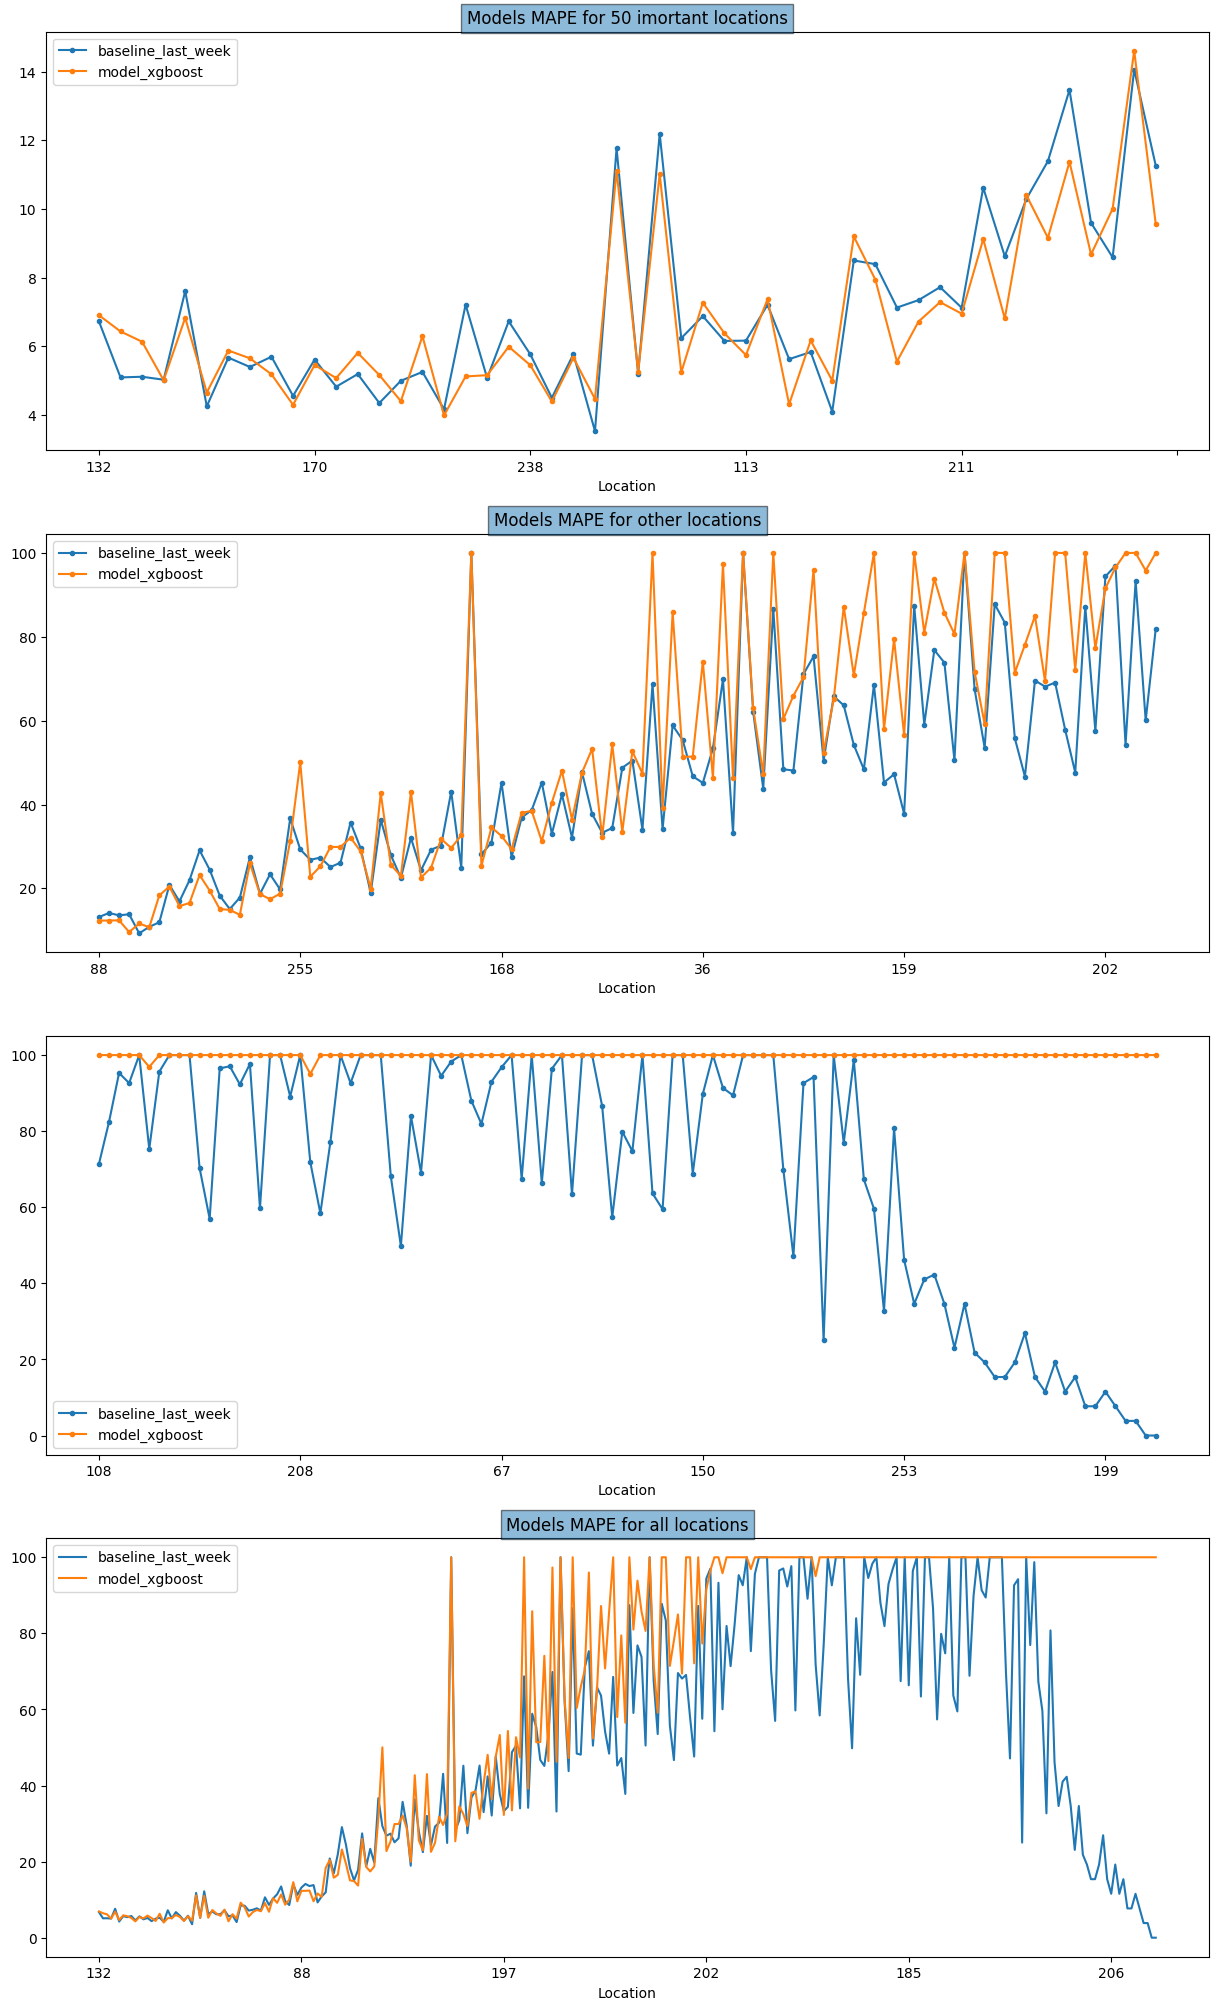

In [766]:
plot_mape(predictions_mean_error_dict, 'Location')

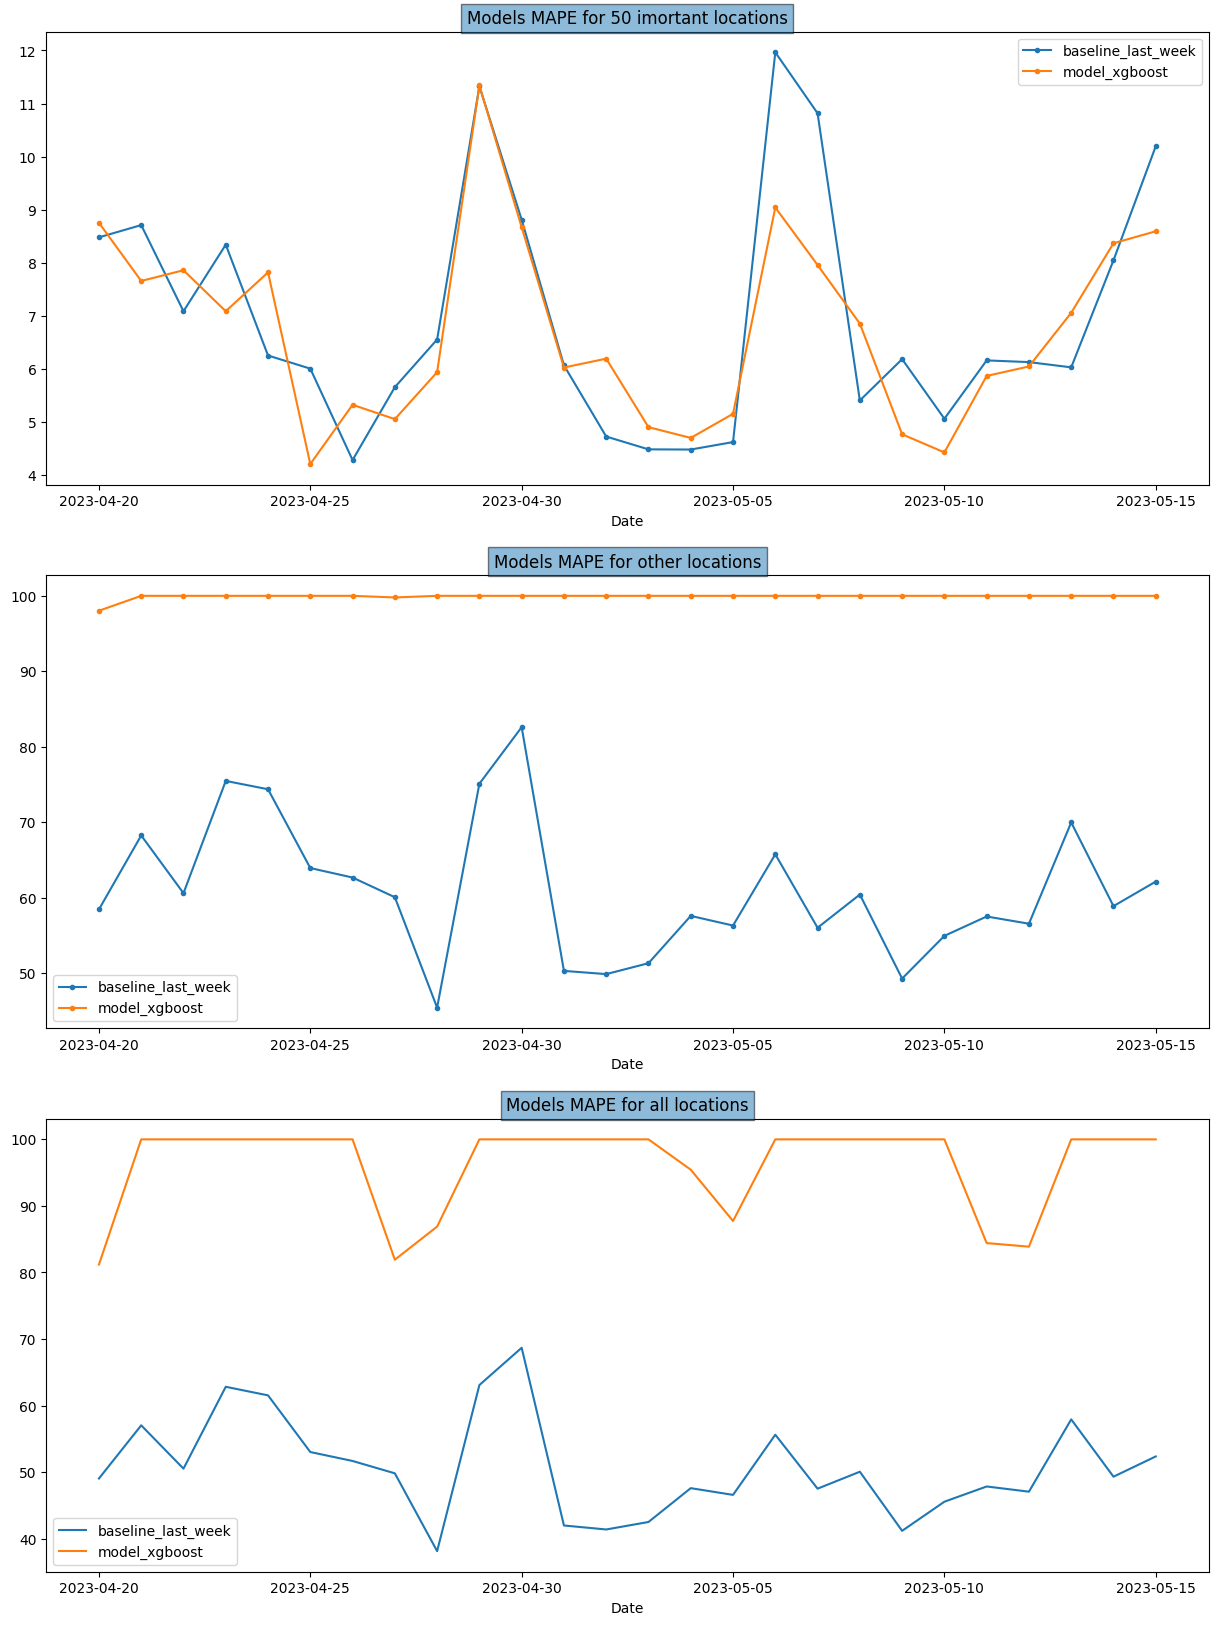

In [767]:
plot_mape(predictions_mean_error_dict, 'Date')

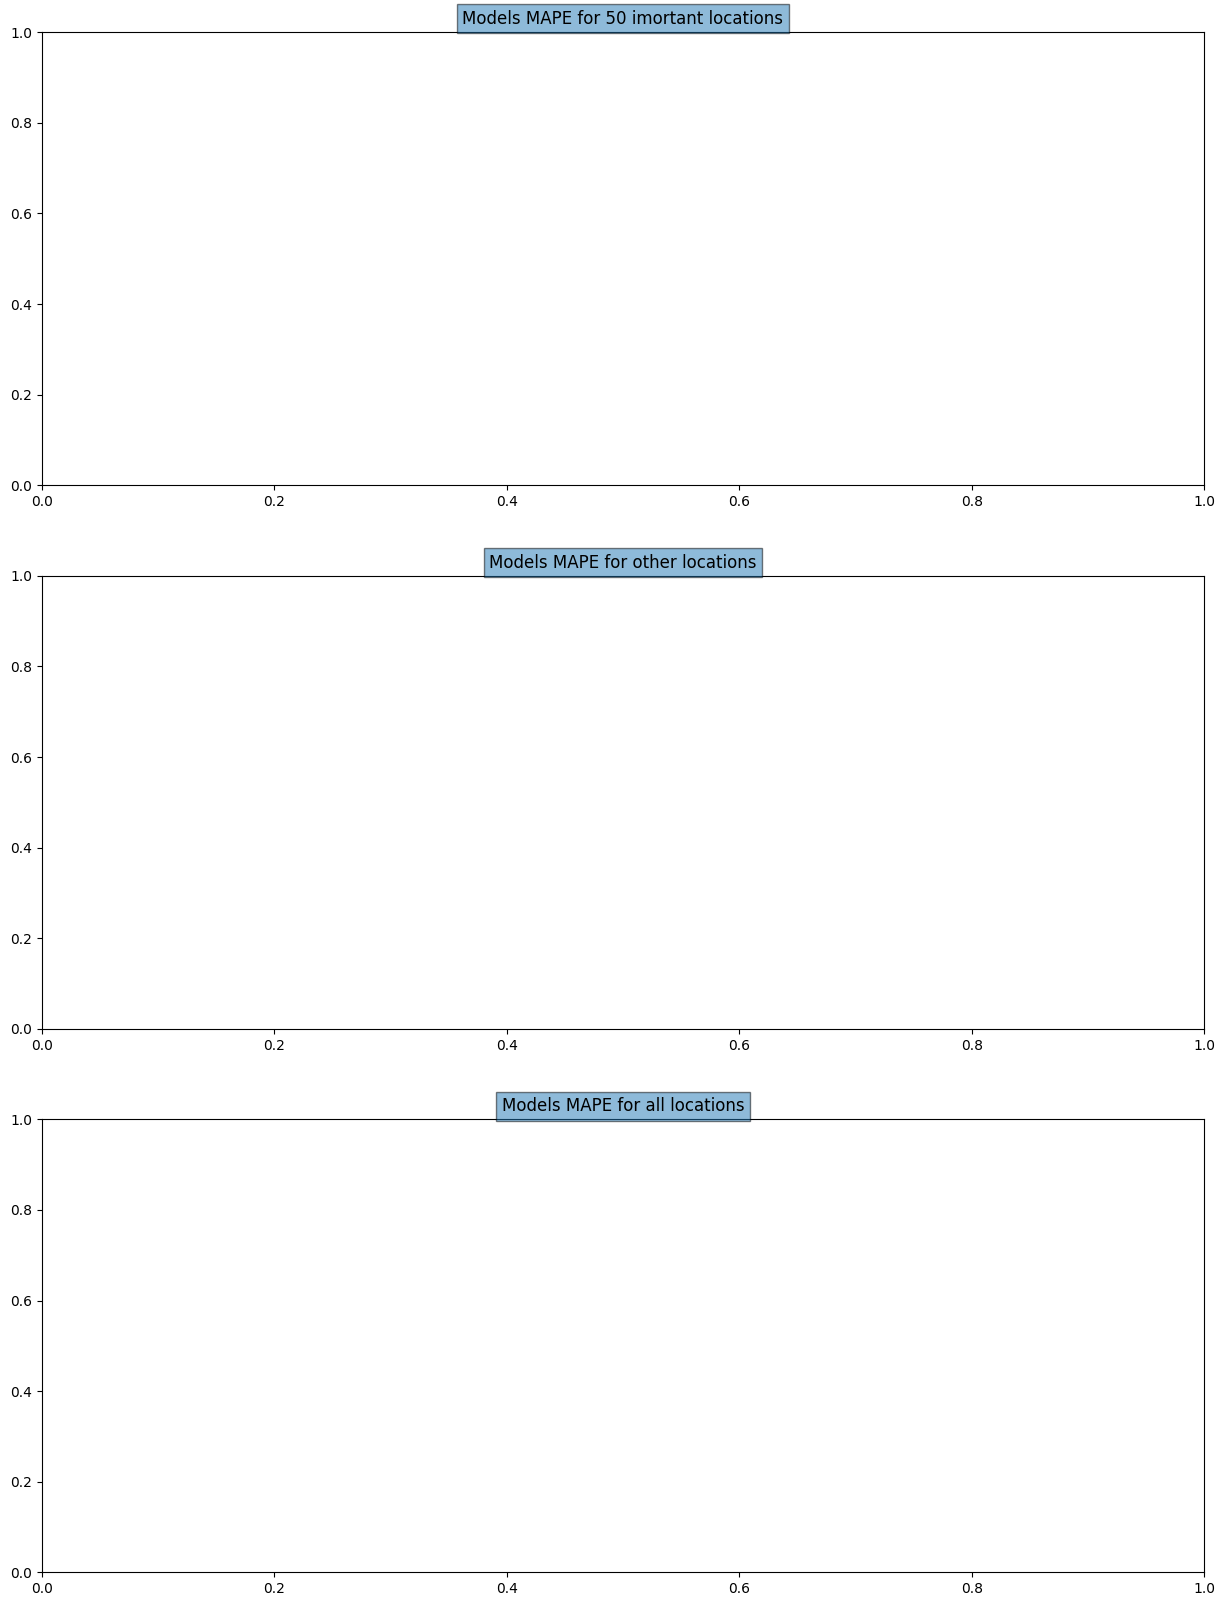

In [768]:
plot_mape(predictions_mean_error_dict, 'day_of_week')

### Plot MAE

In [769]:
def plot_mae(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=(4 if (per == 'Location') else 3 ), ncols=1, figsize=((15,25)if (per == 'Location') else (15,20))) 

    
    for model,mean_df in predictions_mean_dict.items():
        important_df = mean_df[per]['Important_loc']
        other_df = mean_df[per]['Others_loc']
        all_df = mean_df[per]['All_loc']
        if (important_df is not None) and (other_df is not None) and (all_df is not None):

            important_df[per] = important_df[per].astype(str)
            other_df[per] = other_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)
            
            important_df.plot(  x=per,y='mae',kind='line',ax = axes[0],label=model)
            if per == 'Location':
                split_size = len(other_df)//2
                other_df[:split_size].plot(x=per,y='mae',kind='line',ax = axes[1], label=model)
                other_df[split_size:].plot(x=per,y='mae',kind='line',ax = axes[2],label=model)
                all_df.plot(x=per,y='mae',kind='line',ax = axes[3],label=model)
            else:
                other_df.plot(x=per,y='mae',kind='line',ax = axes[1],label=model)
                all_df.plot(x=per,y='mae',kind='line',ax = axes[2],label=model)

    axes[0].set_title('Models MAE for '+str(IMPORTANT_LOCATIONS)+' imortant locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAE for other locations', bbox=dict(alpha=0.5)) 
    axes[-1].set_title('Models MAE for all locations', bbox=dict(alpha=0.5)) 

    plot_name = SAVE_PLOT_PATH + 'MAE_plot per '+per+'.svg'
    plt.savefig(plot_name, format='svg', dpi=1200)


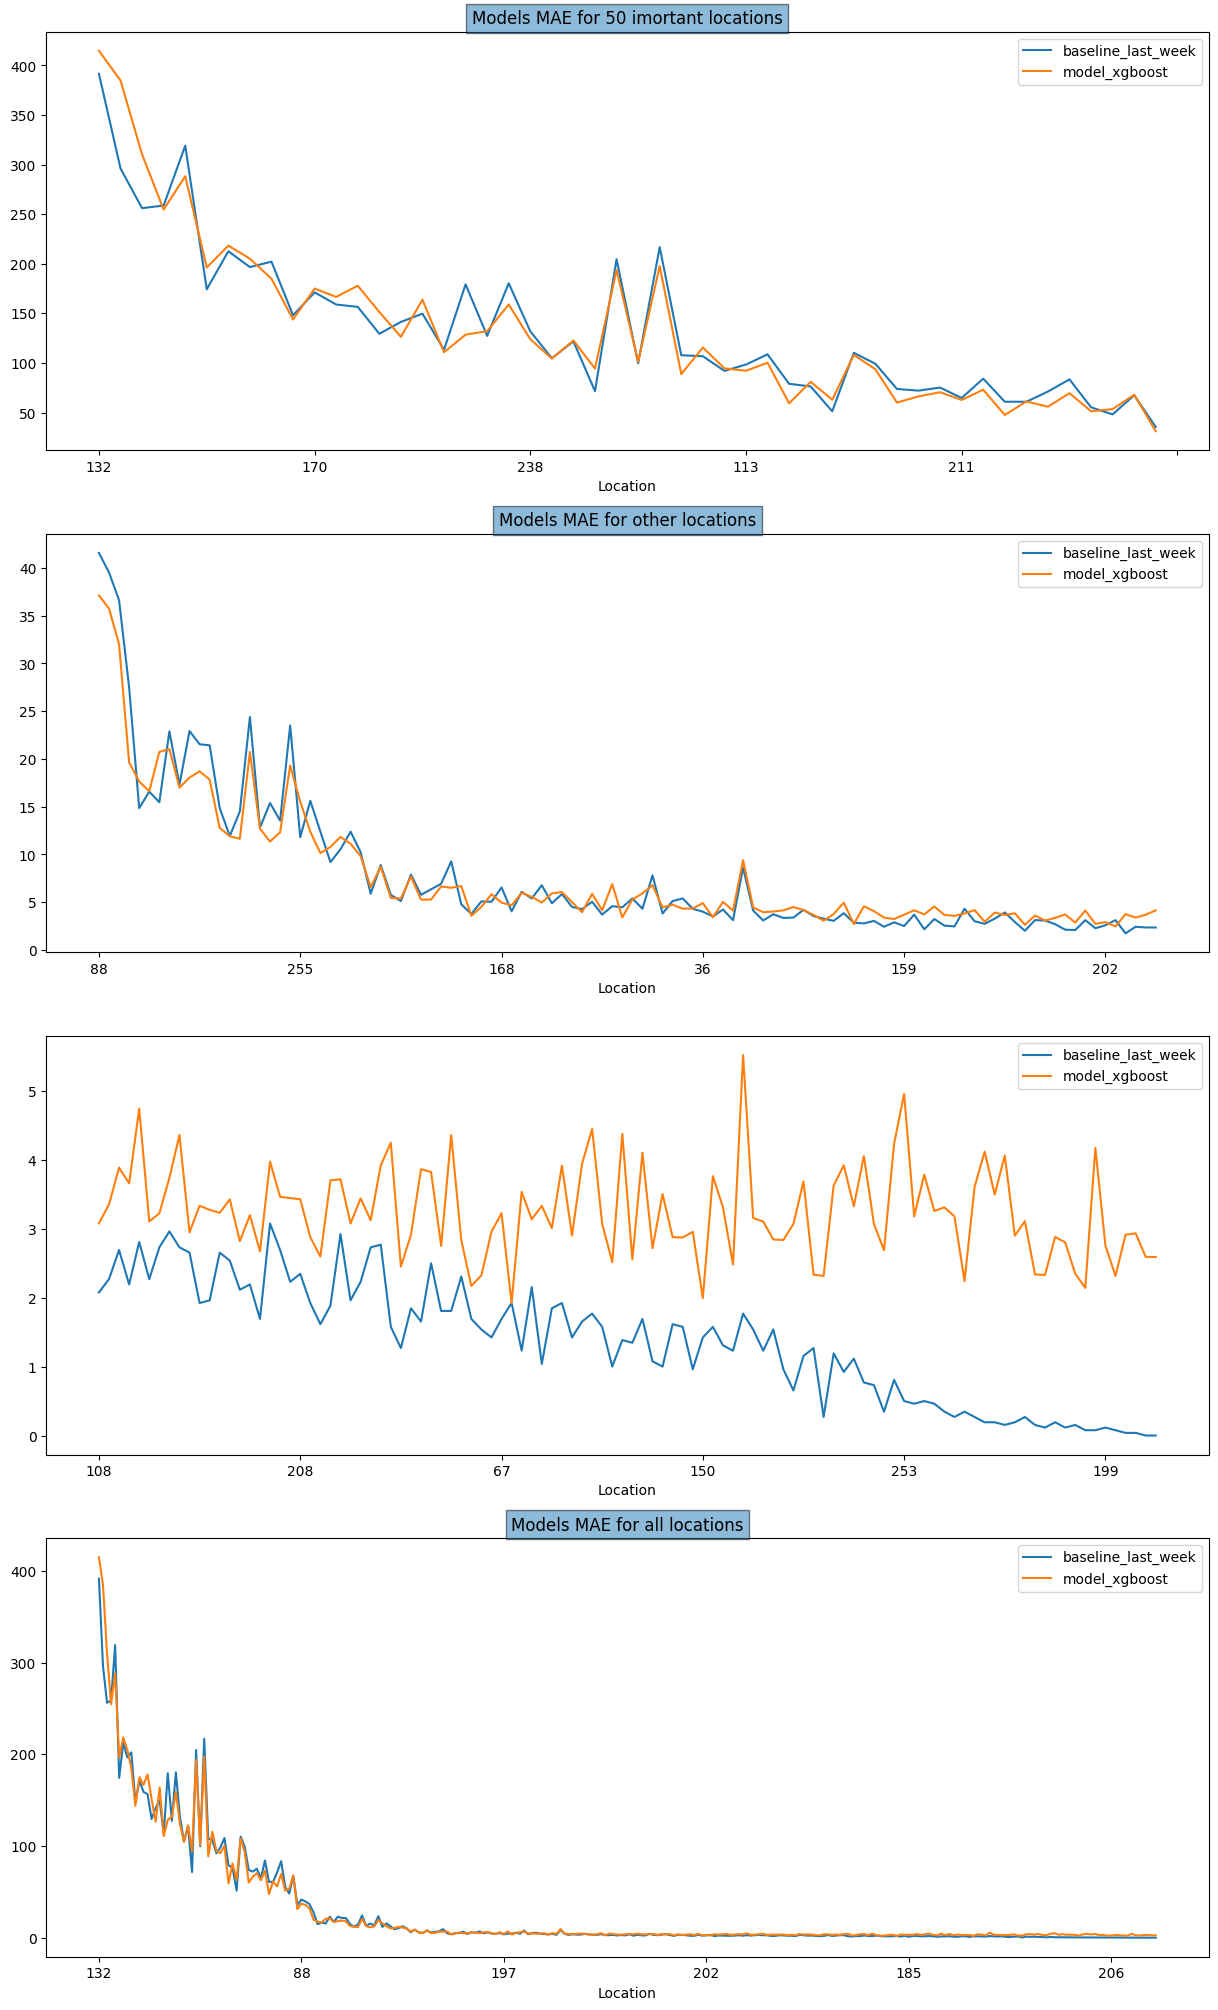

In [770]:
plot_mae(predictions_mean_error_dict, 'Location')

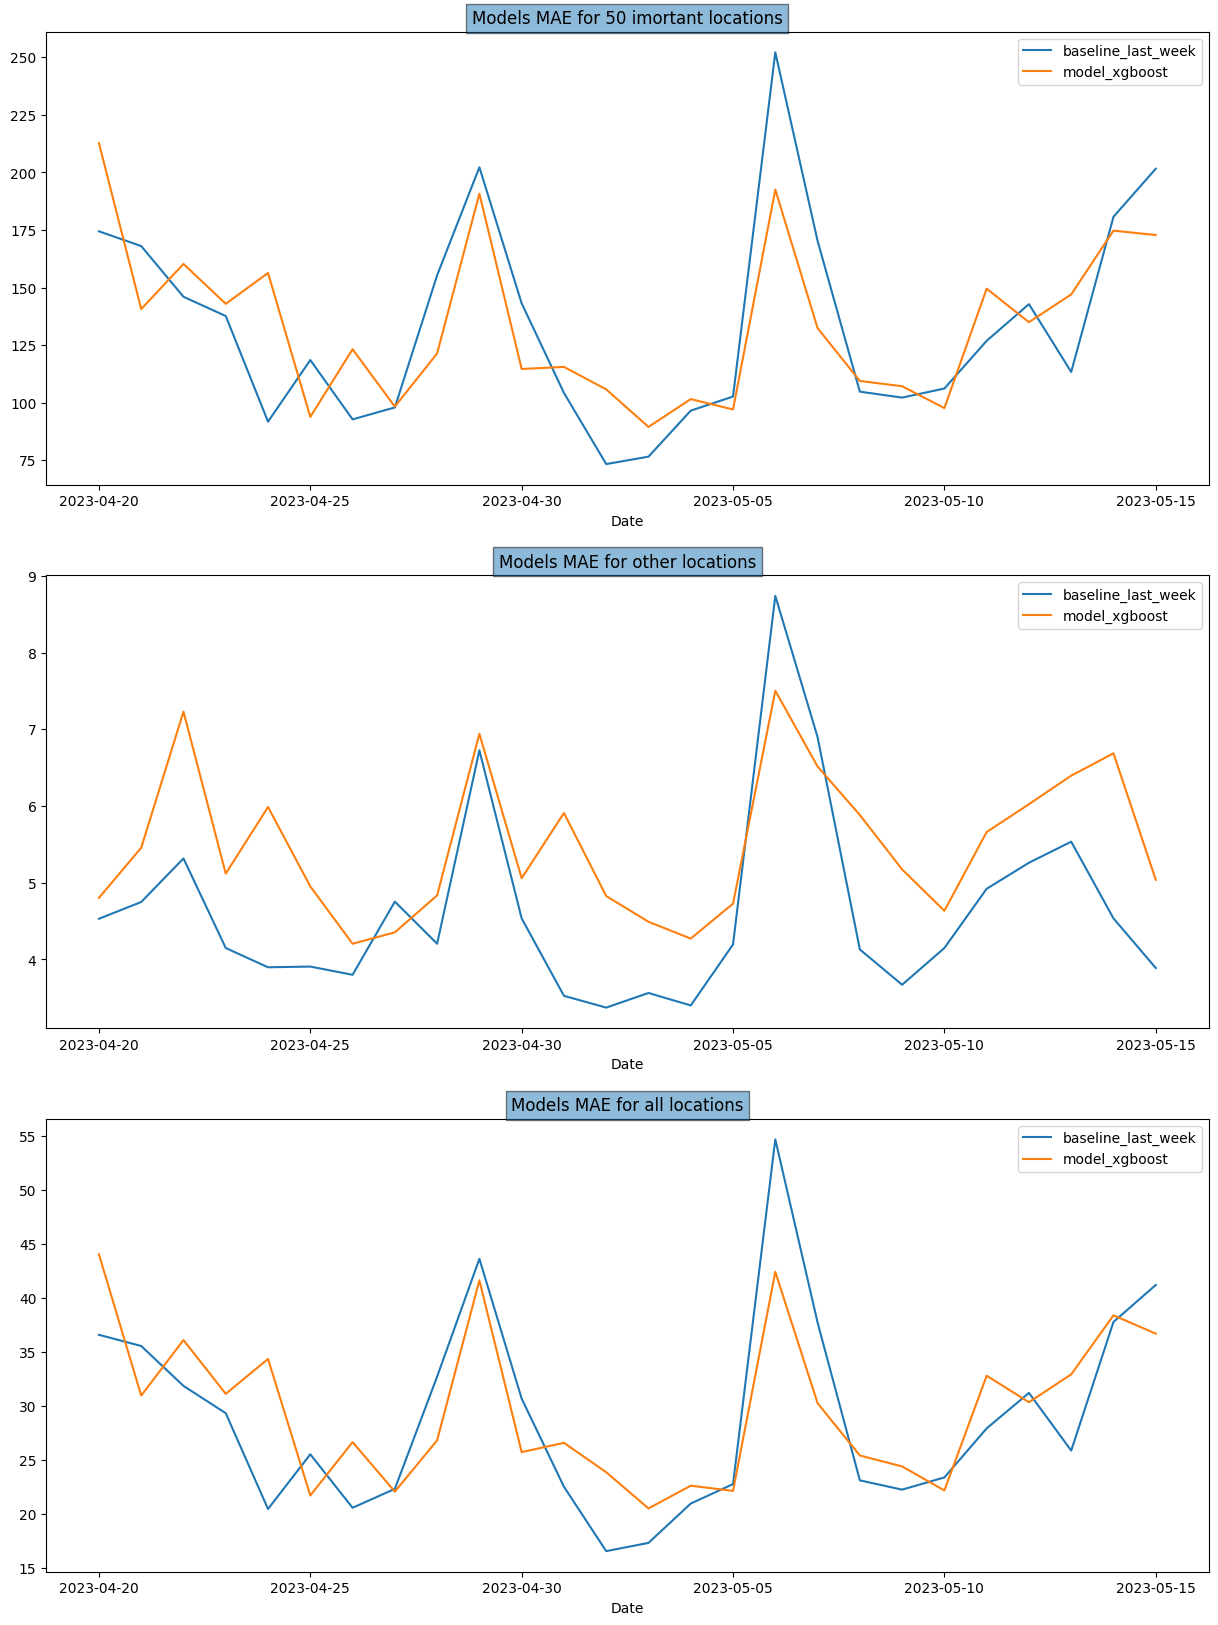

In [771]:
plot_mae(predictions_mean_error_dict, 'Date')

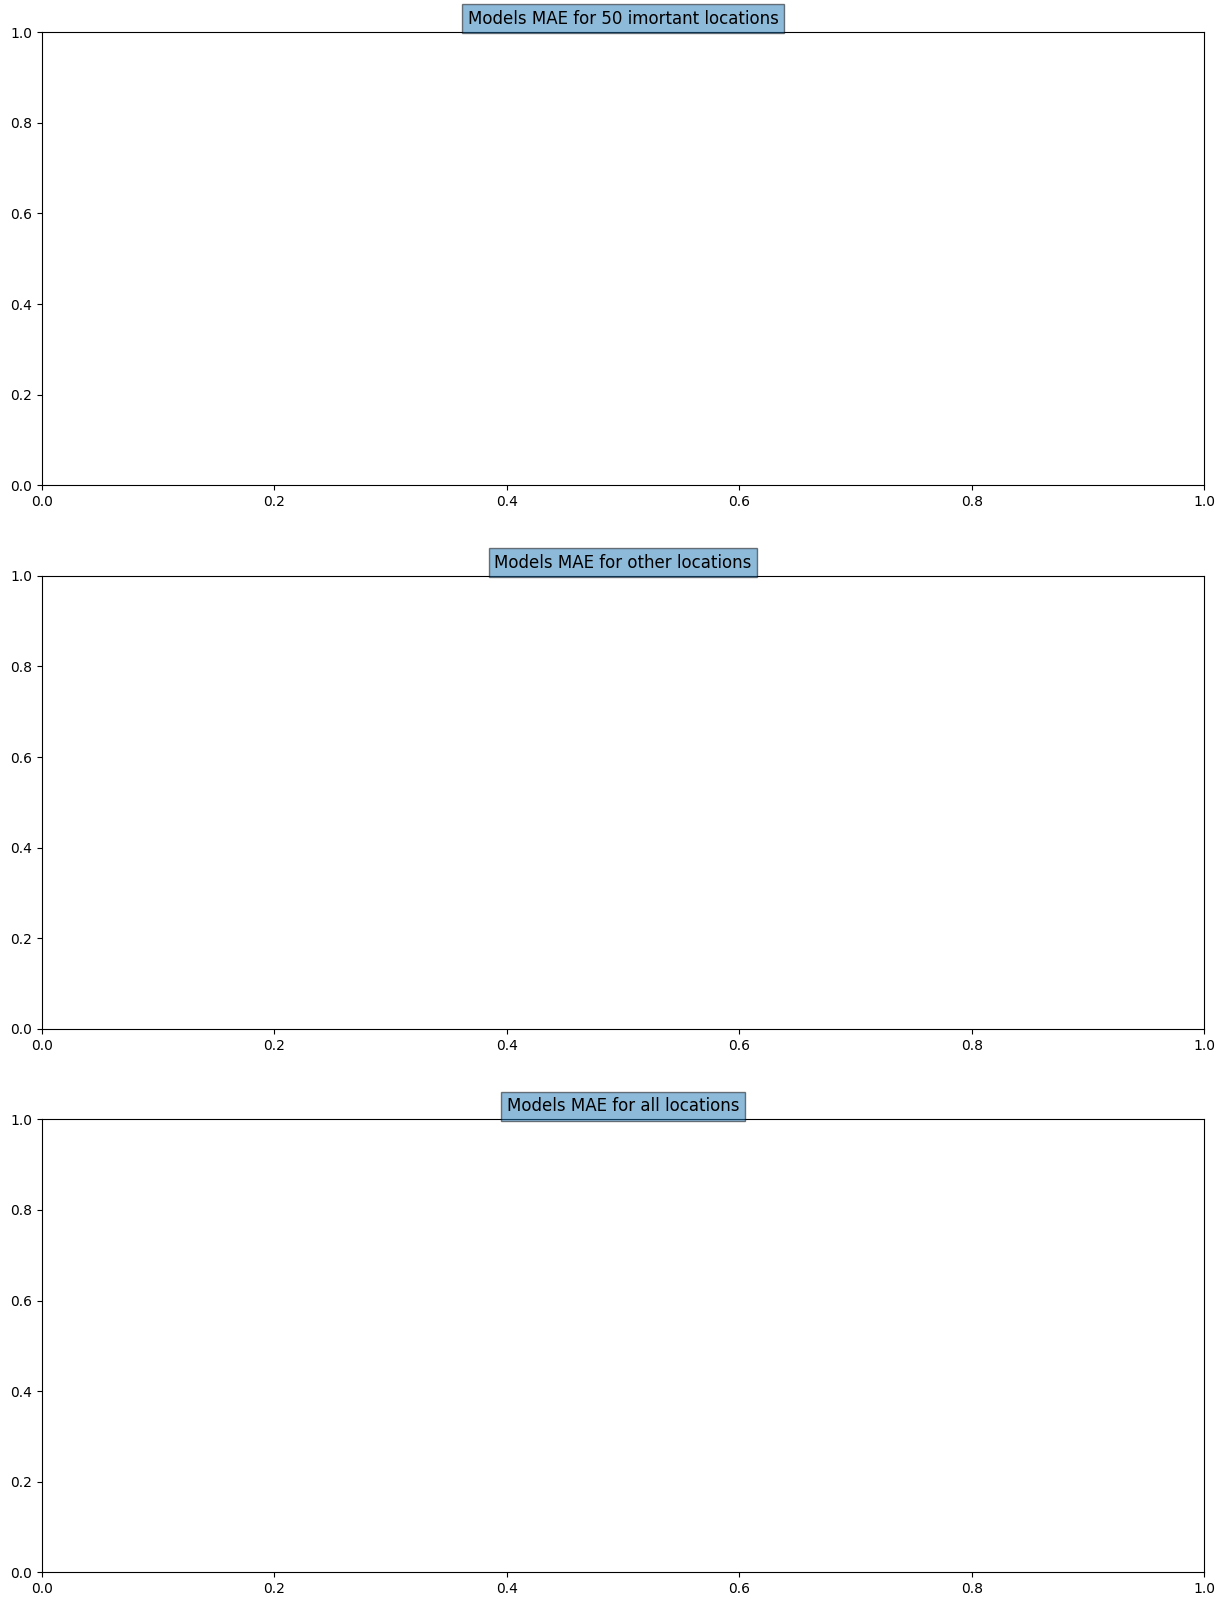

In [772]:
plot_mae(predictions_mean_error_dict, 'day_of_week')

# Table of Results

In [773]:
def create_table_errors(predictions_dict, report_dict):
    for model, error_df in predictions_dict.items():
        if error_df is not None:
            report_dict['all_locations']['MAE'][model] = error_df['error'].mean()            
            report_dict['all_locations']['RMSE'][model] = np.sqrt(error_df['squared_error'].mean())
            report_dict['all_locations']['MAPE'][model] = error_df['percentage_error'].mean()

            error_important_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][:IMPORTANT_LOCATIONS]['Location'])]
            error_others_df = error_df.loc[~error_df['Location'].isin(sorted_locations_dict[model][:IMPORTANT_LOCATIONS]['Location'])]

            report_dict['important_lacations']['MAE'][model] = error_important_df['error'].mean()            
            report_dict['important_lacations']['RMSE'][model] = np.sqrt(error_important_df['squared_error'].mean())
            report_dict['important_lacations']['MAPE'][model] = error_important_df['percentage_error'].mean()
            
            report_dict['others_locations']['MAE'][model] = error_others_df['error'].mean()            
            report_dict['others_locations']['RMSE'][model] = np.sqrt(error_others_df['squared_error'].mean())
            report_dict['others_locations']['MAPE'][model] = error_others_df['percentage_error'].mean()
    return report_dict

In [774]:
report_dict = create_table_errors(predictions_dict, report_dict)
report_df = pd.DataFrame.from_dict({(i,j): report_dict[i][j] 
                            for i in report_dict.keys() 
                            for j in report_dict[i].keys()},
                            orient='index')

report_df.index = pd.MultiIndex.from_tuples(report_df.index)
report_df = report_df.T
report_df = report_df.rename(columns={"('MAPE', 'important_lacations')": "Mape\nhigh_demand_locations"})


In [775]:
df = pd.DataFrame(report_df,
                  index=pd.Index(['baseline_last_week', 'model_regression', 'model_xgboost']),
                  columns=pd.MultiIndex.from_product([['important_lacations', 'others_locations', 'all_locations'],
                                                      ['MAPE','MAE','RMSE']], names=['location category:', 'Error Metrics:']))


In [776]:
df.style.format('{:.2f}')